In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings
warnings.filterwarnings("ignore")

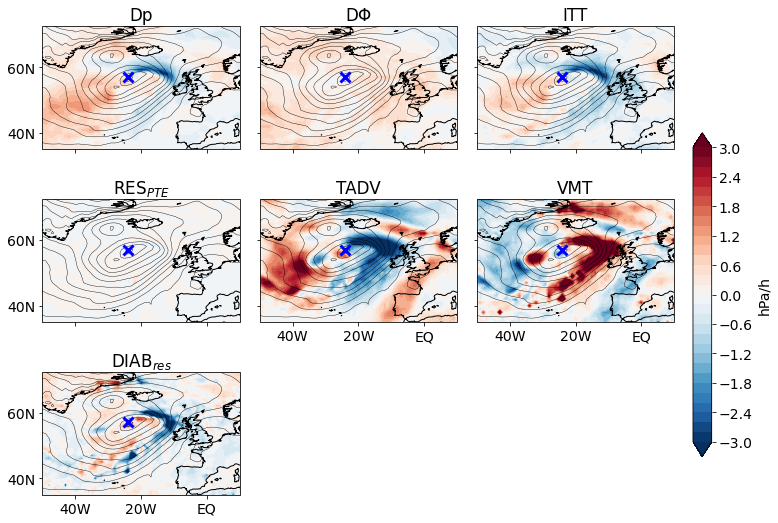

In [5]:
###############################loading pte calculation files#####################

path1='/pf/b/b380796/scratch/NAWDEX_Anubhav/0.025/1deg/1m/'
path2='/work/bb1018/b380723/pte/0.025convoff/1m/'

dp_dt=np.load(path1+'dp_dt.npy')
dfi_dt=np.load(path1+'dfi_dt.npy')
i_itt=np.load(path1+'i_itt.npy')
i_tadv=np.load(path1+'i_tadv.npy')
i_vmt=np.load(path1+'i_vmt.npy')
i_diab_res=np.load(path1+'i_diab_res.npy')

ds=xr.open_dataset(path2+'basicvar_pl_1deg.nc')
mslp=xr.open_dataset(path2+'2dvar_1deg.nc')['pres_msl']
mslpsel=mslp.sel(time='2016-09-23T12:00:00').sel(lat=slice(50, 57), lon=slice(-30,-22))
mslp_coord =mslpsel.where(mslpsel==mslpsel.min(), drop=True)

##########################converting numpy array to xarray###################

time=ds.pres.time
lat=ds.pres.lat.values
lon=ds.pres.lon.values
dp_dt=xr.DataArray(dp_dt, coords={'time': time,'lat': lat, 'lon': lon },
          dims=['time', 'lat', 'lon'])
dfi_dt=xr.DataArray(dfi_dt, coords={'time': time,'lat': lat, 'lon': lon },
          dims=['time', 'lat', 'lon'])
i_itt=xr.DataArray(i_itt, coords={'time': time,'lat': lat, 'lon': lon },
          dims=['time', 'lat', 'lon'])
i_tadv=xr.DataArray(i_tadv, coords={'time': time,'lat': lat, 'lon': lon },
          dims=['time', 'lat', 'lon'])
i_vmt=xr.DataArray(i_vmt, coords={'time': time,'lat': lat, 'lon': lon },
          dims=['time', 'lat', 'lon'])
i_diab_res=xr.DataArray(i_diab_res, coords={'time': time,'lat': lat, 'lon': lon },
          dims=['time', 'lat', 'lon'])

stp = 36
fig=plt.figure(figsize=(13,9))
plt.rcParams.update({'font.size': 14})
plt.subplots_adjust(hspace = 0.3, wspace=0)

ax = plt.subplot(3, 3, 1, projection=ccrs.PlateCarree())
ax.set_xticks([-40,-20,0], crs=ccrs.PlateCarree())
ax.set_xticklabels(['40W','20W','EQ'])
ax.set_yticks([40,60], crs=ccrs.PlateCarree())
ax.set_yticklabels(['40N','60N'])
ax.set_extent([-50, 10, 35, 70])
ax.coastlines()
clevs= np.arange(-3,3.1,0.2)
cd = plt.contourf(dp_dt.lon,dp_dt.lat,dp_dt[stp,:,:]/100,clevs,cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cs = plt.contour(mslp.lon,mslp.lat,mslp[stp,:,:]/100,np.arange(970,1060,4),colors='k',linewidths=0.4,transform=ccrs.PlateCarree())
ax.plot(mslp_coord.lon, mslp_coord.lat, marker='x', markeredgecolor='blue', markersize=10, mew=3)
ax.axes.xaxis.set_ticklabels([])
plt.title('Dp')


ax = plt.subplot(3, 3, 2, projection=ccrs.PlateCarree())
ax.set_xticks([-40,-20,0], crs=ccrs.PlateCarree())
ax.set_xticklabels(['40W','20W','EQ'])
ax.set_yticks([40,60], crs=ccrs.PlateCarree())
ax.set_yticklabels(['40N','60N'])
ax.set_extent([-50, 10, 35, 70])
ax.coastlines()
clevs= np.arange(-3,3.1,0.2)
cd = plt.contourf(dfi_dt.lon,dfi_dt.lat,dfi_dt[stp,:,:]/100,clevs,cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cs = plt.contour(mslp.lon,mslp.lat,mslp[stp,:,:]/100,np.arange(970,1060,4),colors='k',linewidths=0.4,transform=ccrs.PlateCarree())
ax.plot(mslp_coord.lon, mslp_coord.lat, marker='x', markeredgecolor='blue', markersize=10, mew=3)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.title('DΦ')


ax = plt.subplot(3, 3, 3, projection=ccrs.PlateCarree())
ax.set_xticks([-40,-20,0], crs=ccrs.PlateCarree())
ax.set_xticklabels(['40W','20W','EQ'])
ax.set_yticks([40,60], crs=ccrs.PlateCarree())
ax.set_yticklabels(['40N','60N'])
ax.set_extent([-50, 10, 35, 70])
ax.coastlines()
clevs= np.arange(-3,3.1,0.2)
cd = plt.contourf(i_itt.lon,i_itt.lat,i_itt[stp,:,:]/100,clevs,cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cs = plt.contour(mslp.lon,mslp.lat,mslp[stp,:,:]/100,np.arange(970,1060,4),colors='k',linewidths=0.4,transform=ccrs.PlateCarree())
ax.plot(mslp_coord.lon, mslp_coord.lat, marker='x', markeredgecolor='blue', markersize=10, mew=3)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.title('ITT')


ax = plt.subplot(3, 3, 4, projection=ccrs.PlateCarree())
ax.set_xticks([-40,-20,0], crs=ccrs.PlateCarree())
ax.set_xticklabels(['40W','20W','EQ'])
ax.set_yticks([40,60], crs=ccrs.PlateCarree())
ax.set_yticklabels(['40N','60N'])
ax.set_extent([-50, 10, 35, 70])
ax.coastlines()
clevs= np.arange(-3,3.1,0.2)
cd = plt.contourf(dp_dt.lon,dp_dt.lat,(dp_dt[stp,:,:]- dfi_dt[stp,:,:]- i_itt[stp,:,:])/100,clevs,cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cs = plt.contour(mslp.lon,mslp.lat ,mslp[stp,:,:]/100,np.arange(970,1060,4),colors='k',linewidths=0.4,transform=ccrs.PlateCarree())
ax.plot(mslp_coord.lon, mslp_coord.lat, marker='x', markeredgecolor='blue', markersize=10, mew=3)
ax.axes.xaxis.set_ticklabels([])
plt.title('RES$_{PTE}$')


ax = plt.subplot(3, 3, 5, projection=ccrs.PlateCarree())
ax.set_xticks([-40,-20,0], crs=ccrs.PlateCarree())
ax.set_xticklabels(['40W','20W','EQ'])
ax.set_yticks([40,60], crs=ccrs.PlateCarree())
ax.set_yticklabels(['40N','60N'])
ax.set_extent([-50, 10, 35, 70])
ax.coastlines()
clevs= np.arange(-3,3.1,0.2)
cd = plt.contourf(i_tadv.lon,i_tadv.lat,i_tadv[stp,:,:]/100,clevs,cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cs = plt.contour(mslp.lon,mslp.lat ,mslp[stp,:,:]/100,np.arange(970,1060,4),colors='k',linewidths=0.4,transform=ccrs.PlateCarree())
ax.plot(mslp_coord.lon, mslp_coord.lat, marker='x', markeredgecolor='blue', markersize=10, mew=3)
ax.axes.yaxis.set_ticklabels([])
plt.title('TADV')

ax = plt.subplot(3, 3, 6, projection=ccrs.PlateCarree())
ax.set_xticks([-40,-20,0], crs=ccrs.PlateCarree())
ax.set_xticklabels(['40W','20W','EQ'])
ax.set_yticks([40,60], crs=ccrs.PlateCarree())
ax.set_yticklabels(['40N','60N'])
ax.set_extent([-50, 10, 35, 70])
ax.coastlines()
clevs= np.arange(-3,3.1,0.2)
cd = plt.contourf(i_vmt.lon,i_vmt.lat,i_vmt[stp,:,:]/100,clevs,cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cs = plt.contour(mslp.lon,mslp.lat ,mslp[stp,:,:]/100,np.arange(970,1060,4),colors='k',linewidths=0.4,transform=ccrs.PlateCarree())
ax.plot(mslp_coord.lon, mslp_coord.lat, marker='x', markeredgecolor='blue', markersize=10, mew=3)
ax.axes.yaxis.set_ticklabels([])
plt.title('VMT')


ax = plt.subplot(3, 3, 7, projection=ccrs.PlateCarree())
ax.set_xticks([-40,-20,0], crs=ccrs.PlateCarree())
ax.set_xticklabels(['40W','20W','EQ'])
ax.set_yticks([40,60], crs=ccrs.PlateCarree())
ax.set_yticklabels(['40N','60N'])
ax.set_extent([-50, 10, 35, 70])
ax.coastlines()
clevs= np.arange(-3,3.1,0.2)
cd = plt.contourf(i_diab_res.lon,i_diab_res.lat,i_diab_res[stp,:,:]/100,clevs,cmap='RdBu_r',extend='both',transform=ccrs.PlateCarree())
cs = plt.contour(mslp.lon,mslp.lat ,mslp[stp,:,:]/100,np.arange(970,1060,4),colors='k',linewidths=0.4,transform=ccrs.PlateCarree())
ax.plot(mslp_coord.lon, mslp_coord.lat, marker='x', markeredgecolor='blue', markersize=10, mew=3)
plt.title('DIAB$_{res}$')

# colorbar
cbar_ax = fig.add_axes([0.82, 0.2, 0.02, 0.5]) # left,bottom,width,height
ticks=[-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]
cb = fig.colorbar(cd, cax=cbar_ax, ticks=ticks, orientation='vertical', extend='')
cb.set_label('hPa/h', fontsize=14, labelpad=5)
cb.ax.tick_params(labelsize=14)
fig.subplots_adjust(right=0.8, wspace=0.1, hspace=0.2)


plt.show()
